In [166]:
import pandas as pd
# accesses file on Tesla stock price history and returns that data as a dataframe
def load_data() -> pd.DataFrame:
    url = "https://lukashager.netlify.app/econ-481/data/TSLA.csv"
    return pd.read_csv(url)
todd = load_data()
data = load_data()
robb = load_data()
hank = load_data()
patt = load_data()
todd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3467,2024-04-09,172.910004,179.220001,171.919998,176.880005,176.880005,103232700
3468,2024-04-10,173.039993,174.929993,170.009995,171.759995,171.759995,84532400
3469,2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
3470,2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600


In [167]:
import statsmodels.api as sm
import pandas as pd
def autoregress3(df: pd.DataFrame) -> float:
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    df['Deltax'] = df['Close'].diff()
    df['close_diff_lag'] = df['Deltax'].shift(1)
    df.dropna(subset = ['close_diff_lag', 'Deltax'], inplace = True)
    X = df['close_diff_lag']
    y = df['Deltax']
    model = sm.OLS(y,X).fit(cov_type = 'HC1')
    return model.tvalues['close_diff_lag']
autoregress3(data)

-0.7824767386823547

In [116]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
# takes a single dataframe argument and returns the t statistic on beta_hat0 from the regression
# {P}(Δx_t > 0) = {exp(beta_0 * Δx_{t-1})}/{1 + exp(beta_0 * Δx_{t-1})}
def autoregress_logit(df: pd.DataFrame) -> float:
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    df['Deltax'] = df['Close'].diff()
    df['y'] = (df['Deltax'] > 0).astype(int)
    df['Delta_lag'] = df['Deltax'].shift(1)
    df.dropna(subset = ['Delta_lag', 'y'], inplace = True)
    X = df['Delta_lag']
    y = df['y']
    logit_model = sm.Logit(y,X).fit()
    return logit_model.tvalues['Delta_lag']
autoregress_logit(robb)

Optimization terminated successfully.
         Current function value: 0.692939
         Iterations 3


-1.1998922859586534

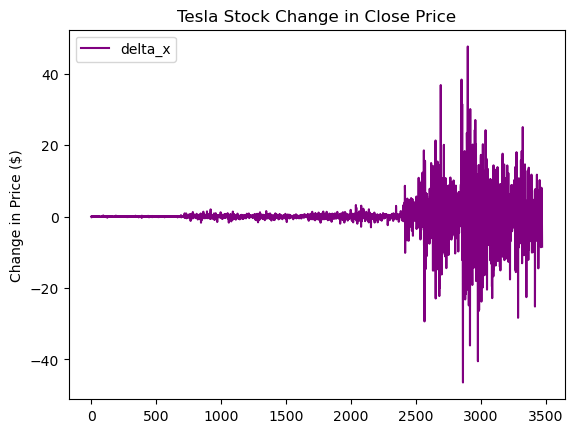

In [115]:
# Exercise 5
# takes a signle dataframe argument and plots Δx_t for the full dataset
def plot_delta(df: pd.DataFrame) -> None:
    df['delta_x'] = df['Close'].diff()
    ax = df.plot(y = 'delta_x', color = 'purple')
    ax.set_title('Tesla Stock Change in Close Price')
    ax.set_ylabel('Change in Price ($)')
plot_delta(hank)

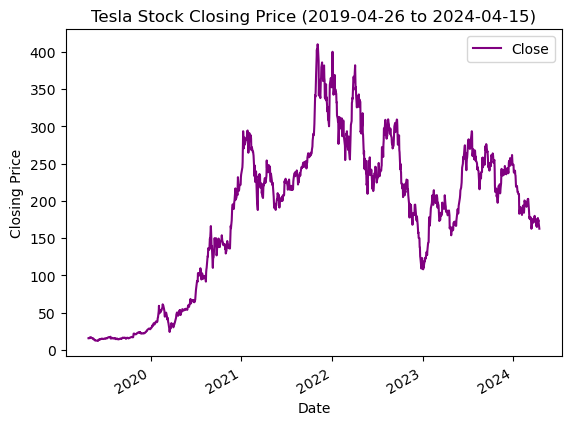

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
# takes output from load_data as well as an optional start and end date
# formatted as 'YYYY-MM-DD' and plots the closing price of stock between dates
# as a line graph, including the data range in the title of the graph
def plot_close(df: pd.DataFrame, start: str = '2010-06-29', end: str = '2024-04-15') -> None:
    df['Date'] = pd.to_datetime(df['Date'])
    df_filter = df.loc[(df['Date'] >= start) & (df['Date'] <= end)]
    ax = df_filter.plot(x = 'Date', y = 'Close', color = 'purple')
    ax.set_title(f"Tesla Stock Closing Price ({start} to {end})")
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
plot_close(todd, '2019-04-26', '2024-04-15')

In [1]:
from sols_04 import *
import numpy as np
import re
import requests

def test_github():
    url = github()
    repo_url = re.search('github\\.com/(.+)/blob', url).group(1)
    req = requests.get(f'https://api.github.com/repos/{repo_url}/stats/participation')
    assert req.json()['all'][-1] > 0

df = load_data()

def test_load_data():
    assert df.shape[0] == 3472

def test_autoregress():
    assert np.all(np.abs(autoregress(df)) < 2)

def test_autoregress_logit():
    assert np.all(np.abs(autoregress_logit(df)) < 2)

ModuleNotFoundError: No module named 'sols_04'